In [1]:
# import libraries

import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (18,5)

import warnings 
warnings.filterwarnings('ignore')

import statsmodels 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
from sklearn.feature_selection import RFE


# Data understanding

In [2]:
bike = pd.read_csv(r'E:\PROJECTS\Bike Sharing Assignment\day.csv') 
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

* 730 rows 
* 16 columns 

In [4]:
# checking the null values 
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* we don't have any null value

In [5]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

* column 'dteday' should be in datetime format 

In [6]:
bike.dteday = bike.dteday.astype('datetime64') 
bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

* there are some columns which name's are not understandable so lets rename them .

In [7]:
# renaming some columns for better understanding  
bike = bike.rename(columns = {'dteday':'date',
                              'yr':'year',
                              'hum':'humidity' , 
                              'mnth':'month',
                              }) 
bike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


* there are some categorical variables in integer datatype lets convert them to categorical string .

In [8]:
# converting categorical integer variables to categorical string values . 
months = {1:'jan', 2:'feb', 3:'mar', 
          4:'apr', 5:'may', 6:'jun',
          7:'jul', 8:'aug', 9:'sep'
          ,10:'oct',11:'nov', 12:'dec'} 

bike.month = bike.month.map(months) 

seasons = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}  

bike.season = bike.season.map(seasons) 

weekdays = {0:'sun' , 1:'mon' , 2:'tues' , 3:'wed' , 4:'thurs' , 5:'fri' , 6:'sat'} 
 
bike.weekday = bike.weekday.map(weekdays)  

weather_situation = {1: 'Clear',2:'Mist' ,3:'Light_Snow',4:'Heavy_Rain'} 

bike.weathersit = bike.weathersit.map(weather_situation)

bike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,jan,0,tues,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,jan,0,thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# we dont need instant and date columns so lets drop them  
bike.drop(['instant' , 'date'] , axis = 1 , inplace = True) 
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,tues,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory data analysis (EDA)


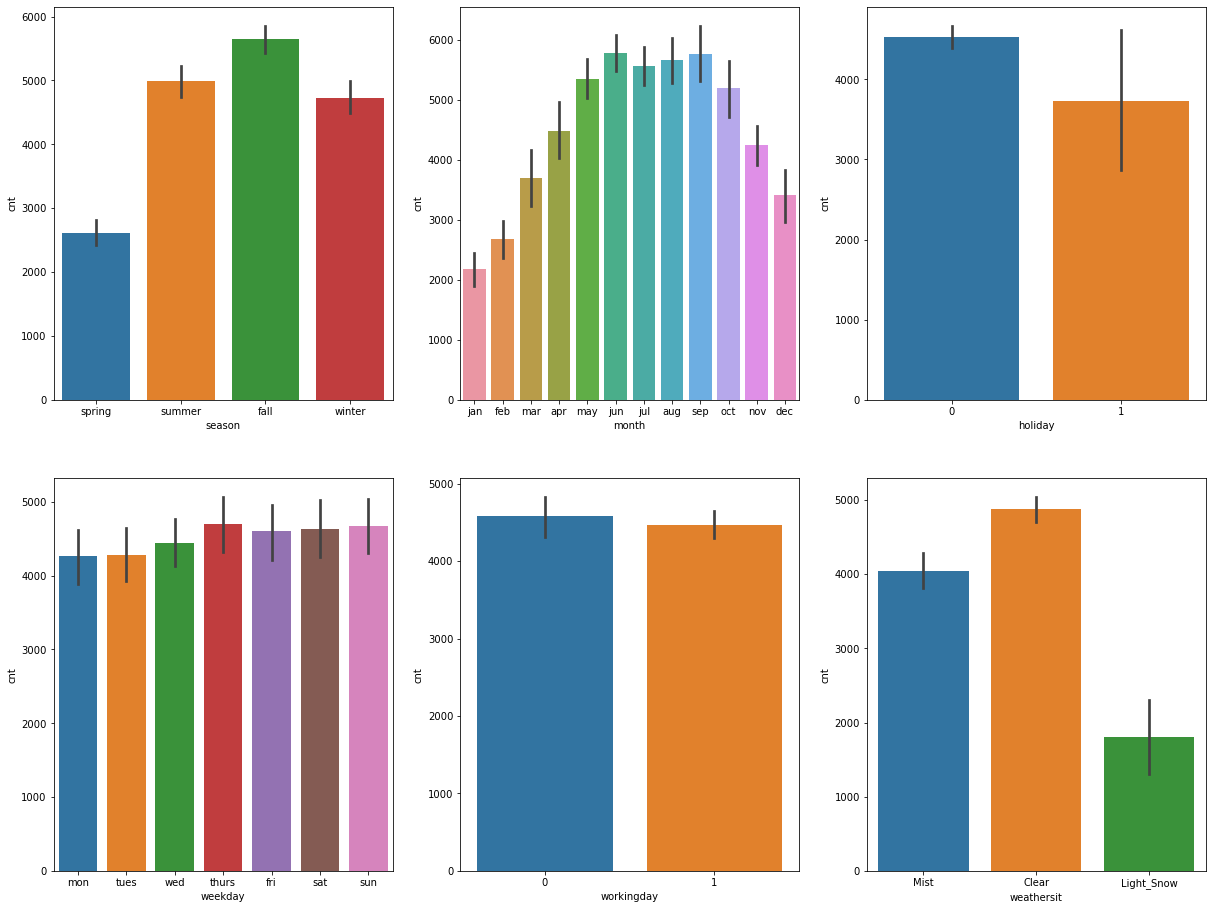

In [10]:
categorical_data_list = ['season','month','holiday','weekday','workingday','weathersit']
fig, ax = plt.subplots(2,3, figsize = (20,15))
counter=0
for i in categorical_data_list:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.barplot(x=i,y='cnt',ax=ax[trace_x, trace_y],data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    counter += 1
plt.show()

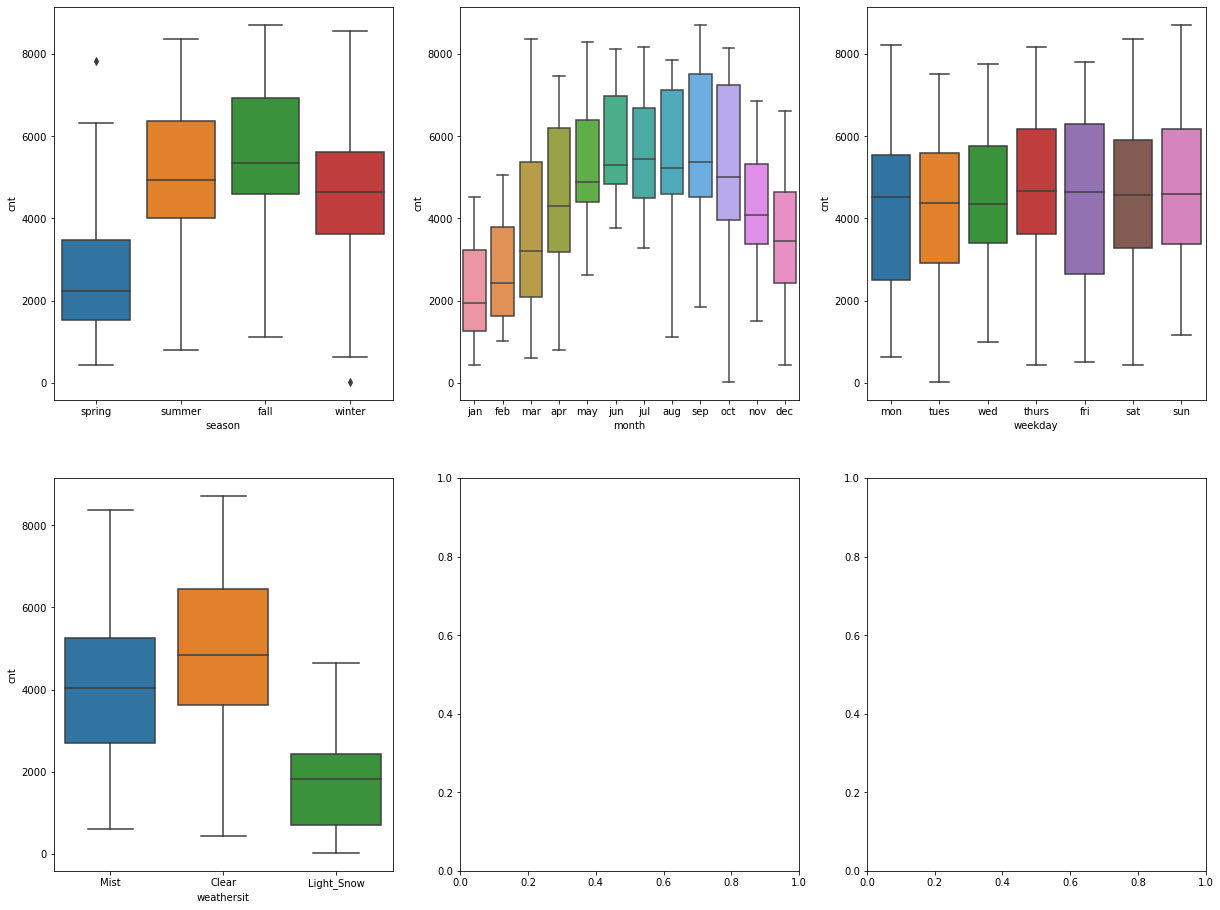

In [11]:
features = ['season', 'month', 'weekday', 'weathersit']
fig, ax = plt.subplots(2,3, figsize = (20,15))
counter=0
for i in features:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.boxplot(x=i,y='cnt',ax=ax[trace_x, trace_y],data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    counter += 1
plt.show()

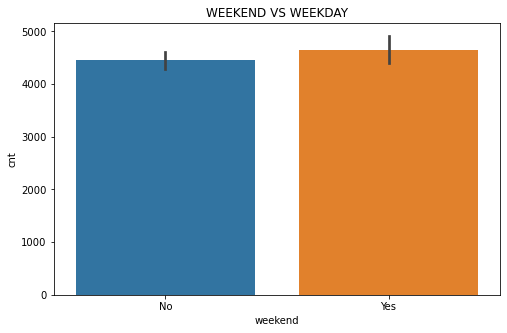

In [12]:
# lets make a new column weekend and see is there any impact of weekend on counts of rental bikes 
bike['weekend']=bike['weekday'].apply(lambda x:1 if (x=='sat' or x=='sun') else 0) 
plt.figure(figsize=[8,5])
sns.barplot(data=bike,x='weekend', y='cnt')  
plt.xticks([0,1],['No','Yes'])
plt.title('WEEKEND VS WEEKDAY')
plt.show() 

# Inference 
* The count of rental bikes is higher in the fall season followed by summer and winter but it's lower in spring .
* The count of rental bikes is higher in the months of June , July ,August and September .
* The number of rental bikes is lower on holidays .
* The count of rental bikes is higher on thursday followed by saturday and sunday .
* The count  of rental bikes is slightly lower on working days .
* count of rental bikes is higher if weather situation is Clear or Few clouds and lower in case of light snow . 
* count of rental bikes is slightly higher in weekends


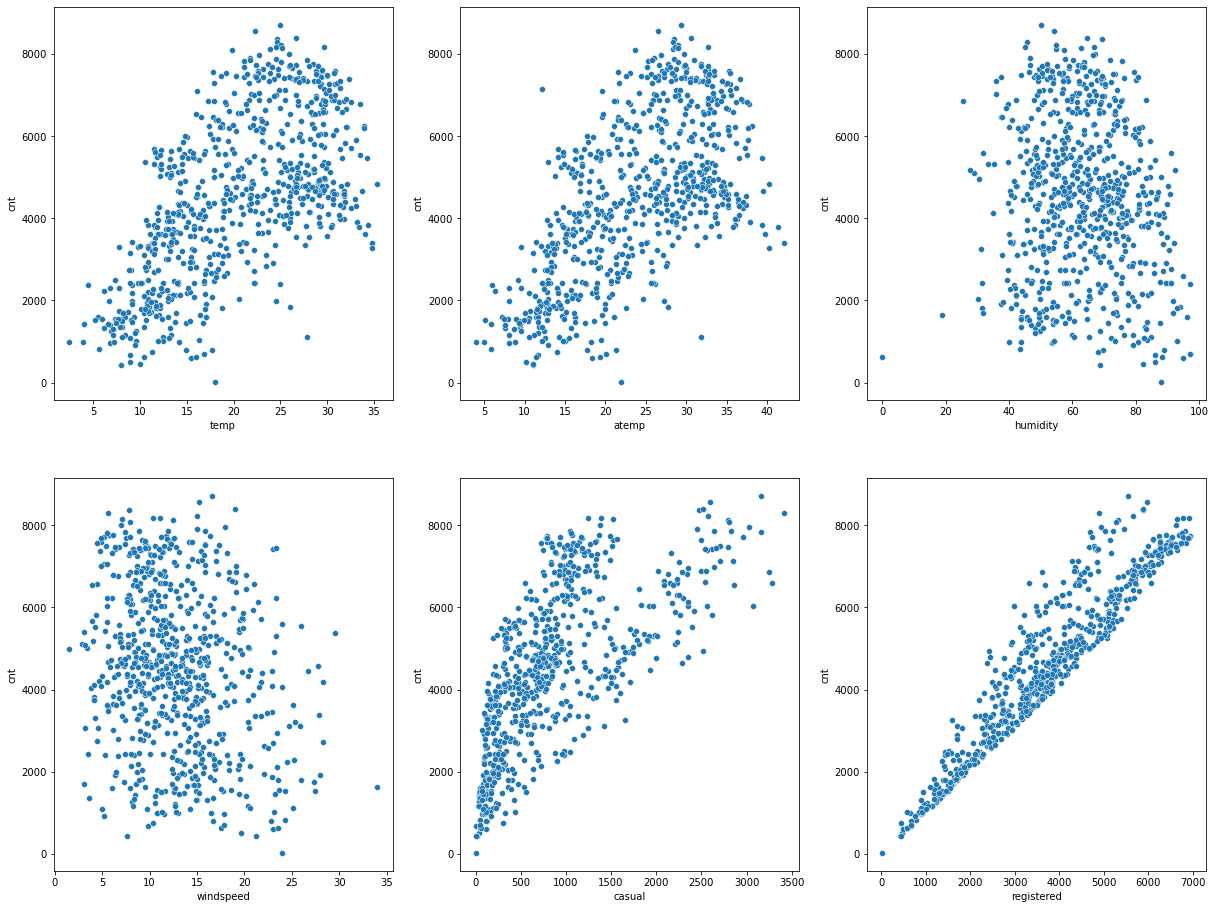

In [13]:
numerical_data_list = ['temp','atemp','humidity','windspeed','casual','registered']
fig, ax = plt.subplots(2,3, figsize = (20,15))
counter=0
for i in numerical_data_list:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.scatterplot(x=i,y='cnt',ax=ax[trace_x, trace_y],data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    counter += 1
plt.show()

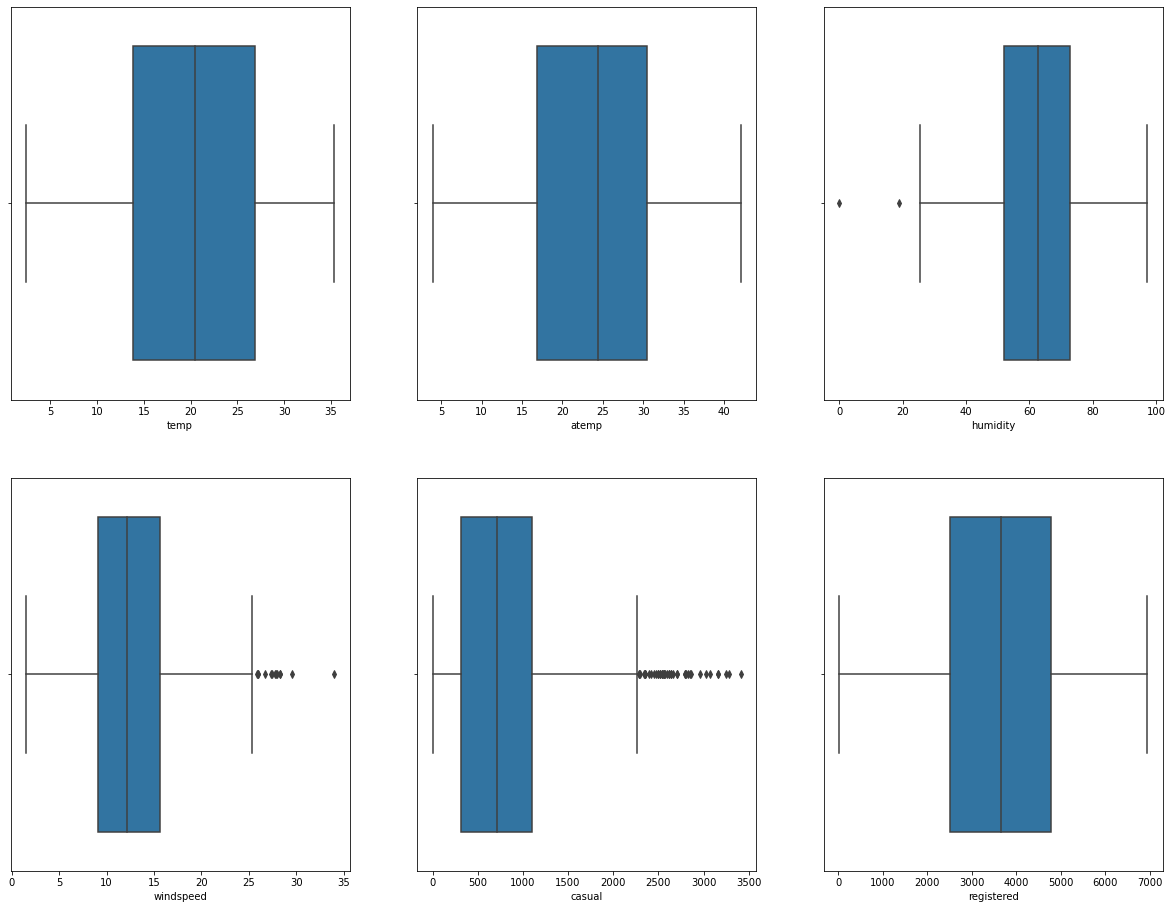

In [14]:
# draw boxplot for numerical columns for checking the outliers 
numerical_data_list = ['temp','atemp','humidity','windspeed','casual','registered']
fig, ax = plt.subplots(2,3, figsize = (20,15))
counter=0
for i in numerical_data_list:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.boxplot(x=i,ax=ax[trace_x, trace_y],data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    counter += 1
plt.show()

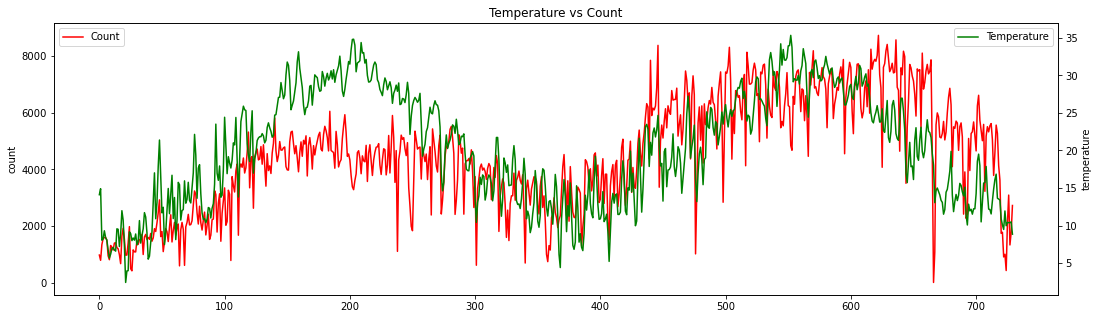

In [15]:
fig, ax = plt.subplots() 
ax.plot(bike.cnt, color='red',label='Count') 
ax.set_ylabel('count') 
ax.set_title('Temperature vs Count') 
ax.legend(loc = 'upper left')
ax2 = ax.twinx() 
ax2.plot(bike.temp, color='green',label = 'Temperature') 
ax2.set_ylabel('temperature') 
ax2.legend(loc = 'upper right') 
plt.show() 

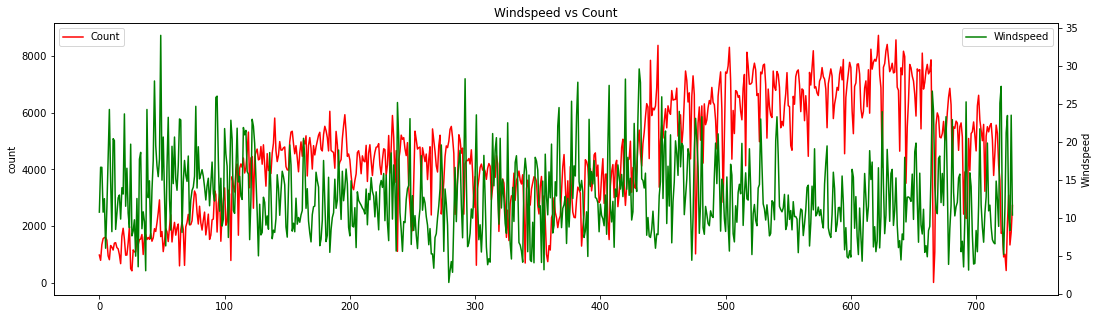

In [16]:
fig, ax = plt.subplots() 
ax.plot(bike.cnt, color='red',label='Count') 
ax.set_ylabel('count') 
ax.set_title('Windspeed vs Count') 
ax.legend(loc = 'upper left')
ax2 = ax.twinx() 
ax2.plot(bike.windspeed, color='green',label = 'Windspeed') 
ax2.set_ylabel('Windspeed') 
ax2.legend(loc = 'upper right') 
plt.show() 

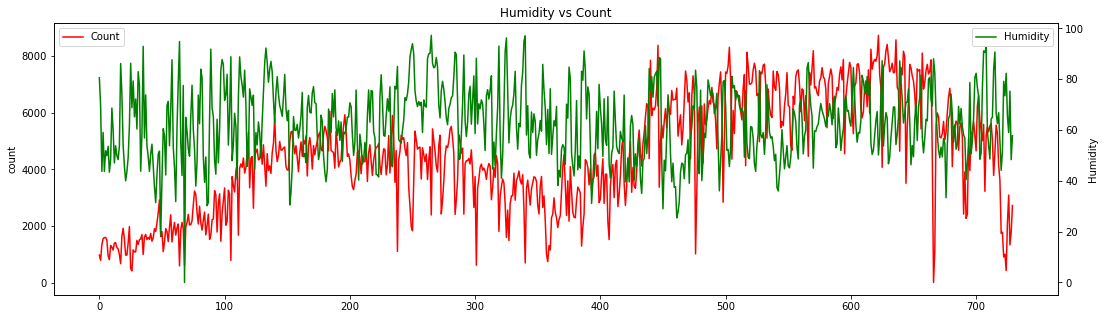

In [17]:
fig, ax = plt.subplots() 
ax.plot(bike.cnt, color='red',label='Count') 
ax.set_ylabel('count') 
ax.set_title('Humidity vs Count') 
ax.legend(loc = 'upper left')
ax2 = ax.twinx() 
ax2.plot(bike.humidity, color='green',label = 'Humidity') 
ax2.set_ylabel('Humidity') 
ax2.legend(loc = 'upper right') 
plt.show() 

# inference 
* Outliers in features  wind speed , casual and humidity are continuous so lets dont drop them keep them as it is .
* when temperature is increase the count of rental bikes are also increased 
* column registered is highly correlated with count of rental bikes 
* windspeed and humidity was not showing so much impact on counts of rental bikes 


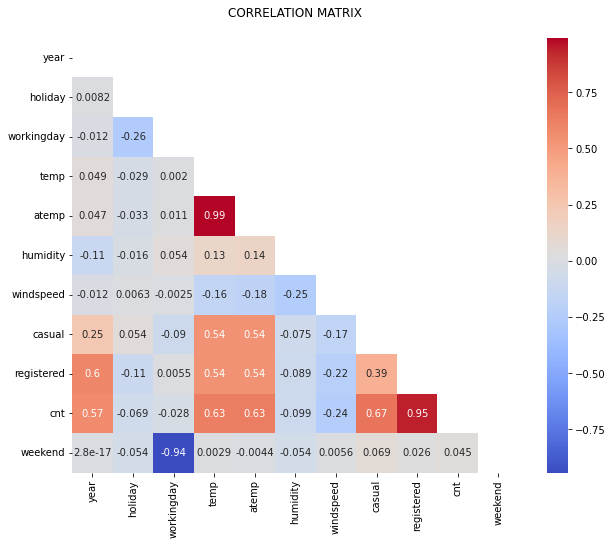

In [18]:
# lets make a correlation heatmap 
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(bike.corr())) 
sns.heatmap(bike.corr(),cmap='coolwarm',annot=True,mask=mask) 
plt.title('CORRELATION MATRIX\n')
plt.show()

# Inference  
* column 'temp' and 'atemp' have high correlation between them so we have to drop one of them because its multicollinearity   means both of them give the same information so for making a model we have to drop one of them .
* column registered is highly correlated with count so we have to drop that variable . 
* as we know that casual + registered = count therefore we have dropped both 'casual' and 'registered' for our model building    because having them would cause multicollinearity . 
* workingday and weekend have high collinearity so we have to remove one of them .

 

# DATA PREPROCESSING 

In [19]:
# removing redundant columns  
bike.drop(['weekend','casual','registered','atemp'],axis=1,inplace = True) 
bike.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600


In [20]:
# now lets make dummy variables for categorical columns 
features = ['season', 'month', 'weekday','weathersit']
status = pd.get_dummies(bike[features],drop_first=True) 
bike = pd.concat([bike,status],axis=1) 
bike.drop(features,axis=1,inplace=True) 
bike.head() 

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_Light_Snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# now lets split the data into train and test set 
bike_train,bike_test = train_test_split(bike,train_size=0.7,random_state=100) 

In [22]:
bike_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_Light_Snow,weathersit_Mist
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [23]:
bike_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_Light_Snow,weathersit_Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
# lets scaled the numerical features 
numerical_columns = ['temp','humidity','windspeed','cnt'] 
scaler=StandardScaler() 
numerical_columns = ['temp','humidity','windspeed','cnt']
bike_train[numerical_columns]=scaler.fit_transform(bike_train[numerical_columns])
bike_train.head() 

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_Light_Snow,weathersit_Mist
576,1,0,1,1.230870,0.515796,-0.331282,1.401236,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,-0.421238,-0.070634,-0.386359,-0.215182,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,-1.295618,-1.046051,2.017388,-1.380030,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,-0.628327,-1.001847,-0.780539,-0.136157,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,-0.849222,0.695551,0.354275,-1.438016,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [25]:
bike_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_Light_Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,-2.920322e-16,-2.166023e-16,5.828671e-17,1.493359e-16,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,-2.381884e+00,-4.464419e+00,-1.891589e+00,-2.290356e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.756866e-01,-7.675694e-01,-7.174407e-01,-7.006211e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,2.285273e-02,2.219277e-02,-1.421889e-01,2.291863e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.765214e-01,7.161828e-01,5.515521e-01,7.636488e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,2.050027e+00,2.398847e+00,4.003357e+00,2.169933e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Standard deviation of columns temp,humidity,windspeed and cnt are 1 and mean is approximately 0 so we scaled successfully .

# Model building

In [26]:
# splitting X_train and y_train 
y_train = bike_train.pop('cnt')
X_train = bike_train 

In [27]:
# lets use RFE(Recursive feature elimination ) and see what are the top5 and top10 features 

lm=LinearRegression()  
lm.fit(X_train,y_train) 

rfe_top5 = RFE(lm,5)             
rfe_top5 = rfe_top5.fit(X_train, y_train) 

rfe_top10 = RFE(lm,10)             
rfe_top10 = rfe_top10.fit(X_train, y_train) 

rfe_top15 = RFE(lm,15)             
rfe_top10 = rfe_top15.fit(X_train, y_train) 

print(f'top_5 columns -> {X_train.columns[rfe_top5.support_].to_list()}')
print()
print(f'top_10 columns -> {X_train.columns[rfe_top10.support_].to_list()}') 
print()
print(f'top_15 columns -> {X_train.columns[rfe_top15.support_].to_list()}')

top_5 columns -> ['year', 'holiday', 'temp', 'season_spring', 'weathersit_Light_Snow']

top_10 columns -> ['year', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_nov', 'month_sep', 'weathersit_Light_Snow', 'weathersit_Mist']

top_15 columns -> ['year', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_nov', 'month_sep', 'weathersit_Light_Snow', 'weathersit_Mist']


# Model 1 
* lets make a model using top 5 features 
* 'year', 'holiday', 'temp', 'season_spring', 'weathersit_Light Snow'

In [28]:
features = ['year', 'holiday', 'temp', 'season_spring', 'weathersit_Light_Snow']
X_train_top5 = X_train[features] 
X_train_top5 = sm.add_constant(X_train_top5) 
lm = sm.OLS(y_train , X_train_top5).fit() 
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     354.5
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          2.02e-162
Time:                        14:18:09   Log-Likelihood:                -339.18
No. Observations:                 510   AIC:                             690.4
Df Residuals:                     504   BIC:                             715.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.32

In [29]:
# define a function for calculating VIF(Variance inflation factor) 
def VIF(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor 
    X=X.drop('const',axis=1)
    Vif={} 
    count=0
    for i in X.columns:
        Vif[i] = round(variance_inflation_factor(X.values  , count) ,2)
        count+=1
    Vif = pd.DataFrame(list(Vif.items()),columns=['Features','VIF']).sort_values('VIF',ascending=False) 
    return Vif 

VIF(X_train_top5)

,Features,VIF
3,season_spring,1.72
2,temp,1.54
0,year,1.26
1,holiday,1.02
4,weathersit_Light_Snow,1.01


* p-value for all 5 features are <0.05 so its significant 
* VIF for all 5 features are <5 so its significant 
* model 1 R-squared = 0.779 and Adj. R-squared = 0.776 


# Model 2 
* lets add 'month_jul', 'month_nov', 'month_sep' and see how our model work 

In [30]:
features = ['year', 'holiday', 'temp', 'season_spring', 'weathersit_Light_Snow' ,  'month_jul', 'month_nov', 'month_sep'] 
X_train_top8 = X_train[features] 
X_train_top8 = sm.add_constant(X_train_top8) 
lm = sm.OLS(y_train , X_train_top8).fit() 
print(lm.summary()) 
print('*'*100)
print(VIF(X_train_top8))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          9.44e-164
Time:                        14:18:09   Log-Likelihood:                -327.19
No. Observations:                 510   AIC:                             672.4
Df Residuals:                     501   BIC:                             710.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.33

* VIF for all features are significant  
* But p-value of month_nov is >0.05 so its not significant we have to remove this from our model 

# Model 3 
* remove 'month_nov' and add 'season_winter' and 'weathersit_Mist'

In [31]:
features = ['year', 'holiday', 'temp', 'season_spring','season_winter','weathersit_Mist', 
            'weathersit_Light_Snow' ,  'month_jul', 'month_sep']  
X_train_top9 = X_train[features] 
X_train_top9 = sm.add_constant(X_train_top9) 
lm = sm.OLS(y_train , X_train_top9).fit() 
print(lm.summary()) 
print('*'*100)
print(VIF(X_train_top9))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          5.25e-181
Time:                        14:18:10   Log-Likelihood:                -283.70
No. Observations:                 510   AIC:                             587.4
Df Residuals:                     500   BIC:                             629.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.29

* p-value and vif is significant 
* R-squared increase to 0.822 from 0.779(model 1 R-squared)

# Model 4 
* adding feature 'windspeed'

In [32]:
features = ['year', 'holiday', 'temp', 'season_spring','season_winter','weathersit_Mist', 
            'weathersit_Light_Snow' ,  'month_jul', 'month_sep' , 'windspeed' ]  
X_train_top10 = X_train[features] 
X_train_top10 = sm.add_constant(X_train_top10) 
lm = sm.OLS(y_train , X_train_top10).fit() 
print(lm.summary()) 
print('*'*100)
print(VIF(X_train_top10 ))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          3.10e-186
Time:                        14:18:10   Log-Likelihood:                -268.48
No. Observations:                 510   AIC:                             559.0
Df Residuals:                     499   BIC:                             605.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.28

* p-value and VIF are significant 
* But when we add 'windspeed' R-squared just increase 0.822 to 0.833 so that not an big impact .

# Model 5 
* adding 'month_dec', 'month_feb', 'month_jan' and see what will be the effect in our model 

In [33]:
features = ['year', 'holiday', 'temp', 'season_spring','season_winter','weathersit_Mist', 
            'weathersit_Light_Snow' ,  'month_jul', 'month_sep' , 'windspeed' ,
           'month_dec', 'month_feb', 'month_jan'] 
X_train_top13 = X_train[features] 
X_train_top13 = sm.add_constant(X_train_top13) 
lm = sm.OLS(y_train , X_train_top13).fit() 
print(lm.summary()) 
print('*'*100)
print(VIF(X_train_top13 ))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.1
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          2.19e-185
Time:                        14:18:10   Log-Likelihood:                -262.04
No. Observations:                 510   AIC:                             552.1
Df Residuals:                     496   BIC:                             611.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

* VIF is significant for all those feature 
* But p-value for month_feb and month_dec was not so significant  
* Also there is no sudden increase in R_squared as well

# Model 6 
* remove month_feb , month_dec and add season_summer 

In [34]:
features = ['year', 'holiday', 'temp', 'season_spring','season_winter','weathersit_Mist', 
            'weathersit_Light_Snow' ,  'month_jul', 'month_sep' , 'windspeed' , 'season_summer', 'month_jan'] 
X_train_top13 = X_train[features] 
X_train_top13 = sm.add_constant(X_train_top13) 
lm = sm.OLS(y_train , X_train_top13).fit() 
print(lm.summary()) 
print('*'*100)
print(VIF(X_train_top13 ))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          8.14e-187
Time:                        14:18:10   Log-Likelihood:                -261.43
No. Observations:                 510   AIC:                             548.9
Df Residuals:                     497   BIC:                             603.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.41

* VIF and p-values are significant 
* But when we add season_summer there is no such big impact showing on R-squared 

# Final Model

In [35]:
features = ['year', 'holiday', 'temp', 'season_spring','season_winter','weathersit_Mist', 
            'weathersit_Light_Snow' ,  'month_jul', 'month_sep']  
X_train_final = X_train[features] 
X_train_final = sm.add_constant(X_train_final) 
lm = sm.OLS(y_train , X_train_final).fit() 
print(lm.summary()) 
print('*'*100)
print(VIF(X_train_final))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          5.25e-181
Time:                        14:18:10   Log-Likelihood:                -283.70
No. Observations:                 510   AIC:                             587.4
Df Residuals:                     500   BIC:                             629.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.29

# Residual analysis and validating the assumptions 

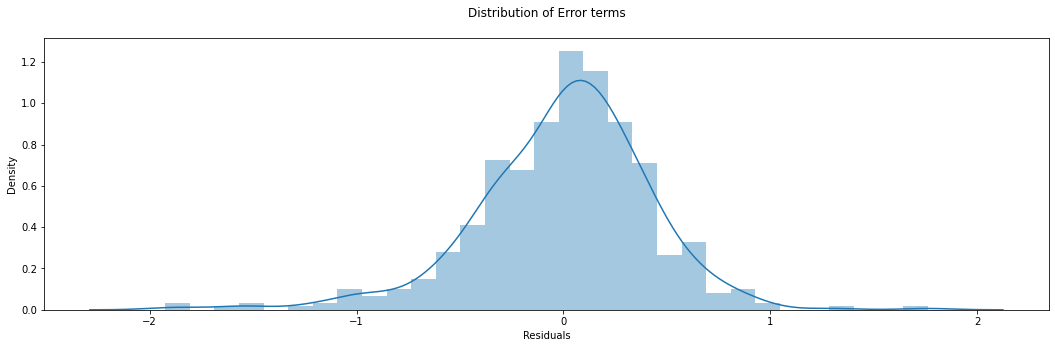

In [36]:
y_train_pred = lm.predict(X_train_final) 
res = y_train - y_train_pred 
sns.distplot(res) 
plt.title('Distribution of Error terms\n') 
plt.xlabel('Residuals')
plt.show() 

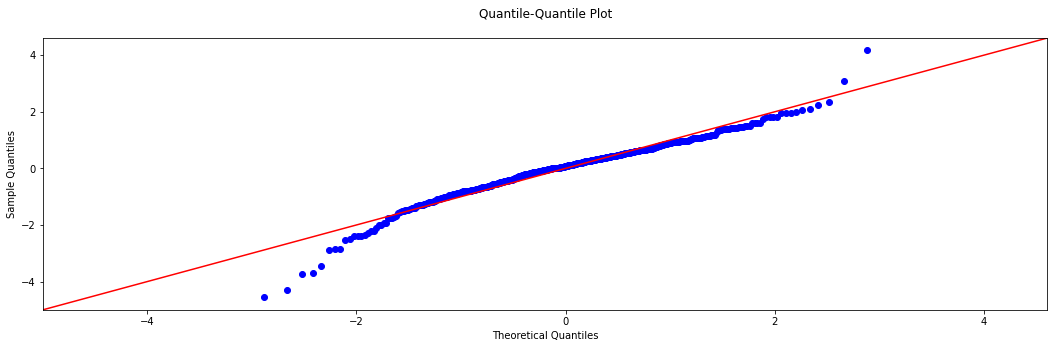

In [37]:
# also plot a Q-Q plot
sm.qqplot(res,line='45',fit=True) 
plt.title('Quantile-Quantile Plot\n')
plt.show()

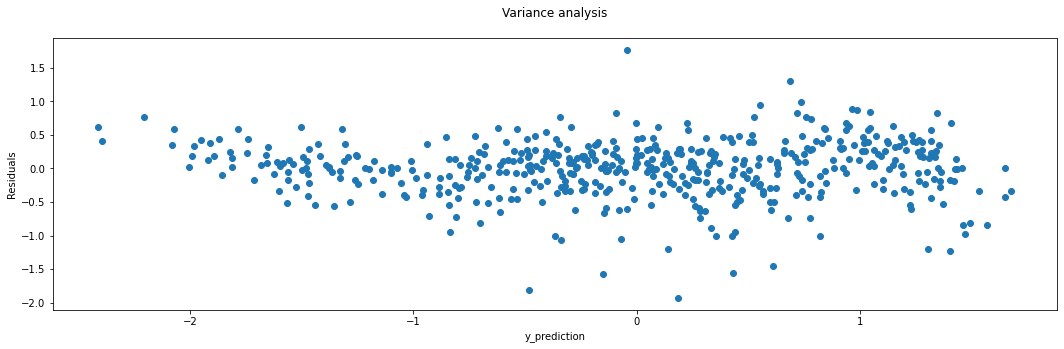

In [38]:
plt.scatter( y_train_pred, res) 
plt.title('Variance analysis\n')
plt.ylabel('Residuals') 
plt.xlabel('y_prediction')
plt.show()

* Error terms are normally distributed with mean approximately zero .
* By observing the Q-Q plot we can clearly see that most of the points are in the line so residuals are normally distributed .
* Error terms have constant variance because the points are randomly scattered ; there is no such pattern . 


# Test the model on testing set

In [39]:
bike_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_Light_Snow,weathersit_Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
# first we have to scaled the test_data 
numerical_features = ['temp','humidity','windspeed','cnt']
bike_test[numerical_features]=scaler.transform(bike_test[numerical_features])  
# now fetch X_test and y_test from df_test 
y_test = bike_test.pop('cnt')
X_test = bike_test 
# we need only those features which was on our final train model 
features = ['year', 'holiday', 'temp', 'season_spring','season_winter','weathersit_Mist', 
            'weathersit_Light_Snow' ,  'month_jul', 'month_sep']  
X_test_sm = X_test[features] 
X_test_sm = sm.add_constant(X_test_sm)
lr_test = sm.OLS(y_test,X_test_sm).fit() 
print(lr_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           3.42e-73
Time:                        14:18:10   Log-Likelihood:                -118.01
No. Observations:                 220   AIC:                             256.0
Df Residuals:                     210   BIC:                             290.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [41]:
y_test_pred = lm.predict(X_test_sm)
print(r2_score(y_test , y_test_pred))
print(r2_score(y_train , y_train_pred))

0.8096078487662723
0.8218825344337095


* The R-squared of train_set and test_set is so close so we have a very good model .

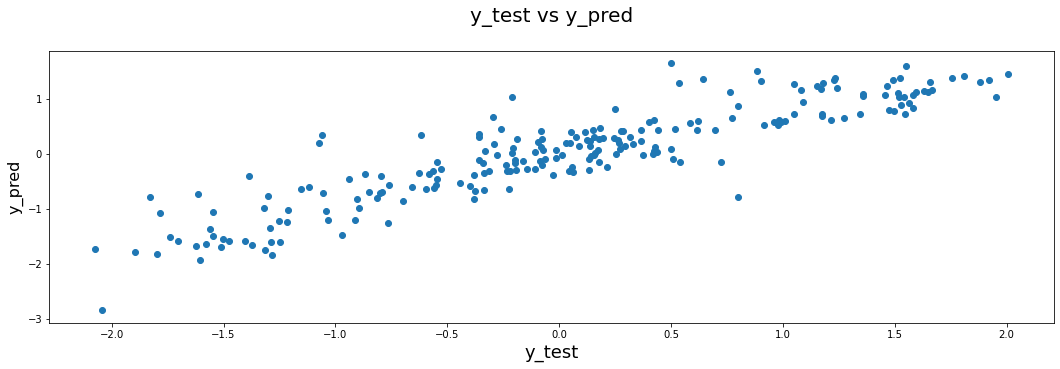

In [42]:
plt.scatter(y_test,y_test_pred) 
plt.title('y_test vs y_pred\n', fontsize=20)         
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.show()

# Interpreting coefficients 

so our final linear equation is :

<li>count of rental bikes = -0.29 + 1.04(year) + 0.47(temp)) + 0.29(month_sep) + 0.23(season_winter) - 0.30(month_jul) -
                          0.34(weathersit_Mist) - 0.50(season_spring) - 0.44(holiday) - 1.33(weathersit_Light snow) </li> 
<li> Temperature , year , September month , winter season are positively impacting rental bike counts</li>
<li> july month , mist weather , spring season , holiday , light snow weather are negatively impacting rental bike counts </li>
 
* top 3 features are 
1. Tempreture
2. year
3. light snow weather condition 

  
* When the weather condition is light Snow/Rain the count of rental bike is decrease by 1.33 standard deviation  . 
* A change of 1 standard deviation in Temperature is associated with a change of 0.47 standard deviations of count of rental bikes . 
* In each year the count of rental bikes is increase by 1.04 standard daviation .
